In [1]:
import smbus
import matplotlib.pyplot as plt

from meerkat import mpu6050, parser

In [2]:
dev = mpu6050.mpu6050(bus_n=1, output='json')

In [3]:
dev.get_temp()

24.15352941176471

In [4]:
dev.set_gyro_range(dev.GYRO_RANGE_1000DEG)
dev.set_accel_range(dev.ACCEL_RANGE_2G)

In [5]:
dev.get_accel_data()

{'x': 19.6133, 'y': 3.883395092773437, 'z': 8.80347950439453}

In [6]:
dev.get_gyro_data()

{'x': -6.251908396946565, 'y': -5.00763358778626, 'z': 5.938931297709924}

In [7]:
dev.get_all_burst(description='example_1', n=2)

[{'accel_data': {'x': 19.6133,
   'y': 3.8953661010742184,
   'z': 8.805873706054687},
  'arange': 0,
  'desc': 'example_1',
  'grange': 16,
  'gyro_data': {'x': -6.129770992366412,
   'y': -5.061068702290076,
   'z': 6.137404580152672},
  'n': 1,
  'temp_C': 24.059411764705885},
 {'accel_data': {'x': 19.6133, 'y': 3.919308117675781, 'z': 8.865728747558594},
  'arange': 0,
  'desc': 'example_1',
  'grange': 16,
  'gyro_data': {'x': -6.320610687022901,
   'y': -4.984732824427481,
   'z': 5.977099236641221},
  'n': 2,
  'temp_C': 24.012352941176474}]

In [8]:
dev = mpu6050.mpu6050(bus_n=1, output='csv')

In [9]:
dev.set_gyro_range(dev.GYRO_RANGE_1000DEG)
dev.set_accel_range(dev.ACCEL_RANGE_2G)

In [10]:
dev.get_all_burst(description='example_1', n=2)

[['example_1',
  1,
  0,
  16,
  19.6133,
  3.902548706054687,
  8.760383874511719,
  -6.282442748091603,
  -4.748091603053435,
  6.32824427480916,
  24.15352941176471],
 ['example_1',
  2,
  0,
  16,
  19.6133,
  3.861847277832031,
  8.825027319335938,
  -6.015267175572519,
  -4.9465648854961835,
  6.1679389312977095,
  24.15352941176471]]

In [11]:
dev.writer.path = 'MPU6050_example.csv'
dev.write_all(description='example_2', n=10)

In [12]:
m, df = parser.csv_resource(dev.writer.path)

In [13]:
df.head()

,std_time_ms,description,sample_n,arange,grange,ax,ay,az,gx,gy,gz,temp_C,datetime64_ns
0,2019-03-16 23:24:33.230313,example_2,1,0,16,19.6133,3.794810,8.659827,-6.076336,-4.977099,6.129771,24.106471,2019-03-16 23:24:33.230313
1,2019-03-16 23:24:33.238659,example_2,2,0,16,19.6133,3.873818,8.769961,-6.183206,-4.839695,6.000000,24.153529,2019-03-16 23:24:33.238659
2,2019-03-16 23:24:33.256992,example_2,3,0,16,19.6133,3.895366,8.772355,-6.198473,-4.938931,6.343511,24.012353,2019-03-16 23:24:33.256992
3,2019-03-16 23:24:33.275824,example_2,4,0,16,19.6133,3.859453,8.734048,-6.190840,-4.801527,6.221374,24.106471,2019-03-16 23:24:33.275824
4,2019-03-16 23:24:33.286445,example_2,5,0,16,19.6133,3.871424,8.786720,-6.183206,-4.694656,5.946565,24.106471,2019-03-16 23:24:33.286445


In [14]:
df.dtypes

std_time_ms              object
description              object
sample_n                  int64
arange                    int64
grange                    int64
ax                      float64
ay                      float64
az                      float64
gx                      float64
gy                      float64
gz                      float64
temp_C                  float64
datetime64_ns    datetime64[ns]
dtype: object

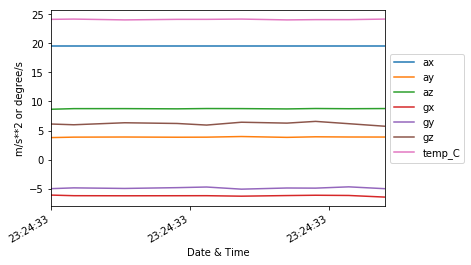

In [15]:
df.datetime64_ns = df.datetime64_ns.dt.tz_localize('UTC')  # Pandas 0.24.1 hack
df[['datetime64_ns', 
    'ax', 'ay', 'az', 
    'gx', 'gy', 'gz', 'temp_C']].plot(x='datetime64_ns');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.xlabel('Date & Time');
plt.ylabel('m/s**2 or degree/s');